# Loan
- Created by Gabriel Wong
- Content:
    - Data Cleaning
        - Target: loan_status {0, 1} (good loan, bad loan)
    - Exploratory Data Analysis
    - Statistical Modeling
        - Performance
            - Cross-validation:     &emsp; &emsp;                                   ROC_AUC (0.908), f1 (0.825), Accuracy (0.825), Precision (0.830), Recall (0.825)
            - Test set:             &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;       ROC_AUC (0.609), f1 (0.708), Accuracy (0.609), Precision (0.722), Recall (0.698) 
        - Top 3 factors
            - sub_grade (loan sub-grade)
            - term (term of loan)
            - int_rate (interest rates)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style("white")
warnings.filterwarnings('ignore')

# Import script
import ml

## Data Cleaning
- Sections:
    - Load Data
    - Set Target & Train-Test Split
    - Clean Data

### Load Data

In [3]:
# Load data
fname = '3_loan'
df = pd.read_csv('0Data/'+fname+'.csv')

df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Set Target & Train-Test Split

In [5]:
# Set general parameters
reg_cla = 0     # Regression (1) or Classification (0)
rand_st = 42    # Random state
q = 3           # Quantile cut

# Set target
target = 'loan_status'

leave = df[target][df[target].isin(['Current', 'Issued', 'In Grace Period'])].index
good = df[target][df[target].isin(['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'])].index
bad = df[target][df[target].isin(['Charged Off', 'Does not meet the credit policy. Status:Charged Off',
                                                  'Late (31-120 days)', 'Late (16-30 days)', 'Default'])].index

df[target][good] = 0
df[target][bad] = 1     

df.drop(leave, axis=0, errors='ignore', inplace=True) 
df.reset_index(drop=True, inplace=True)

In [6]:
# Sample large dataset - Yes (1) or No (0)
sample_y_n = 1
df_ = ml.data_sample(reg_cla, df, target, sample_y_n, rand_st, q, sample_frac=0.1)

# Split dataset into train and test - Yes (1) or No (0)
tset_y_n = 1
X_train, X_test, y_train, y_test, mod_label, y_class = ml.train_test(reg_cla, df_, target, 
                                                                     tset_y_n, rand_st, q, 
                                                                     tset_size=0.1)   
print(X_train.shape, X_test.shape, mod_label, y_class)

(24380, 73) (2709, 73) [0, 1] [0 1]


In [7]:
# New data copy
df2 = X_train.copy()
df2[target] = y_train

# Show basic data info. - raw data
data_inf = ml.data_info(df2)
df2.head(3)

---------- Data Shape ----------
Data:	 (24380, 74)


---------- General Data Info. ----------
                            Unique  Count   Dtypes   Null Null %
id                           24380  24380    int64      0    0.0
url                          24380  24380   object      0    0.0
member_id                    24380  24380    int64      0    0.0
total_pymnt                  24203  24380  float64      0    0.0
total_pymnt_inv              24108  24380  float64      0    0.0
total_rec_int                23394  24380  float64      0    0.0
last_pymnt_amnt              22694  24380  float64      0    0.0
tot_cur_bal                  17593  18313  float64   6067   24.9
revol_bal                    16944  24380  float64      0    0.0
emp_title                    16838  23016   object   1364    5.6
installment                  12422  24380  float64      0    0.0
desc                          8288   8324   object  16056   65.9
total_rec_prncp               6670  24380  float64      0   

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_status
226430,12307434,14299573,13900.0,13900.0,13900.0,36 months,17.57,499.53,D,D2,Paramedic,3 years,RENT,62500.0,Not Verified,Feb-2014,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,026xx,MA,16.02,0.0,Sep-2004,0.0,NaN,NaN,7.0,0.0,10228.0,92.1,9.0,f,0.0,0.0,15536.800000,15536.80,13900.0,1636.80,0.0,0.0,0.0,Oct-2014,12040.09,NaN,Nov-2014,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,39548.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11100.0,NaN,NaN,NaN,0
624,1061380,1293167,25000.0,25000.0,24975.0,36 months,8.90,793.84,A,A5,Sunnyside FArms,4 years,RENT,60000.0,Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/07/11 > I will be using...,debt_consolidation,out of debt loan,945xx,CA,25.40,0.0,Jun-1989,0.0,NaN,NaN,9.0,0.0,28571.0,68.7,16.0,f,0.0,0.0,28576.740046,28548.18,25000.0,3576.74,0.0,0.0,0.0,Dec-2014,799.36,NaN,Dec-2014,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
94463,4309356,5491912,5000.0,5000.0,5000.0,36 months,15.31,174.09,C,C2,quest diagnostics,10+ years,RENT,48000.0,Not Verified,Apr-2013,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,free from debt,076xx,NJ,23.65,0.0,May-1996,0.0,NaN,NaN,11.0,0.0,11157.0,79.7,34.0,w,0.0,0.0,6129.790000,6129.79,5000.0,1129.79,0.0,0.0,0.0,Jun-2015,1951.62,NaN,Dec-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,20688.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000.0,NaN,NaN,NaN,0


### Clean Data

In [8]:
# Column removal, if required
## Remove Nulls
null_threshold = 20     # Any attributes with more than null_threshold will be removed 
null_feat = data_inf['Null %'][data_inf['Null %'] > null_threshold].\
            sort_values(ascending=False).index.values 
df2.drop(null_feat, axis=1, errors='ignore', inplace=True)

## Remove other columns
trim_feat = ['url', 'id', 'member_id', 'policy_code',
             'pymnt_plan', 'application_type',
             'last_pymnt_amnt','recoveries','total_rec_prncp',
             'total_rec_late_fee','total_rec_int','out_prncp',
             'out_prncp_inv','collection_recovery_fee',
             'total_pymnt','total_pymnt_inv',
             'collections_12_mths_ex_med']
df2.drop(trim_feat, axis=1, errors='ignore', inplace=True)

# Show basic data info. - cleaned data
_ = ml.data_info(df2)
df2.head(3)

---------- Data Shape ----------
Data:	 (24380, 32)


---------- General Data Info. ----------
                    Unique  Count   Dtypes  Null Null %
revol_bal            16944  24380  float64     0    0.0
emp_title            16838  23016   object  1364    5.6
installment          12422  24380  float64     0    0.0
title                 6150  24380   object     0    0.0
dti                   3534  24380  float64     0    0.0
annual_inc            3136  24380  float64     0    0.0
funded_amnt_inv       1966  24380  float64     0    0.0
funded_amnt           1072  24380  float64     0    0.0
loan_amnt             1070  24380  float64     0    0.0
revol_util            1050  24361  float64    19    0.1
zip_code               820  24380   object     0    0.0
earliest_cr_line       541  24379   object     1    0.0
int_rate               463  24380  float64     0    0.0
issue_d                103  24380   object     0    0.0
last_pymnt_d            95  24306   object    74    0.3
last_cred

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_pymnt_d,last_credit_pull_d,acc_now_delinq,loan_status
226430,13900.0,13900.0,13900.0,36 months,17.57,499.53,D,D2,Paramedic,3 years,RENT,62500.0,Not Verified,Feb-2014,credit_card,Credit card refinancing,026xx,MA,16.02,0.0,Sep-2004,0.0,7.0,0.0,10228.0,92.1,9.0,f,Oct-2014,Nov-2014,0.0,0
624,25000.0,25000.0,24975.0,36 months,8.90,793.84,A,A5,Sunnyside FArms,4 years,RENT,60000.0,Verified,Dec-2011,debt_consolidation,out of debt loan,945xx,CA,25.40,0.0,Jun-1989,0.0,9.0,0.0,28571.0,68.7,16.0,f,Dec-2014,Dec-2014,0.0,0
94463,5000.0,5000.0,5000.0,36 months,15.31,174.09,C,C2,quest diagnostics,10+ years,RENT,48000.0,Not Verified,Apr-2013,debt_consolidation,free from debt,076xx,NJ,23.65,0.0,May-1996,0.0,11.0,0.0,11157.0,79.7,34.0,w,Jun-2015,Dec-2015,0.0,0


---------- Target distribution - Classification ----------


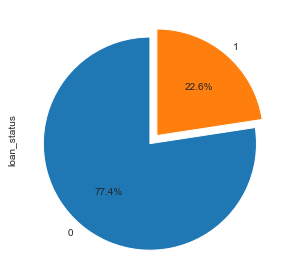

0    0.774159
1    0.225841
Name: loan_status, dtype: float64 



In [9]:
# Show target distribution
## Classification
print('-'*10, 'Target distribution - Classification', '-'*10)
df2[target].value_counts().plot.pie(autopct="%.1f%%", 
                                    explode=[0.05] * len(mod_label), 
                                    startangle=90)
plt.tight_layout()
plt.savefig('1Images/0target_distribution.png', dpi=100)
plt.show()
print(df2[target].value_counts(1), '\n')

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

## Exploratory Data Analysis

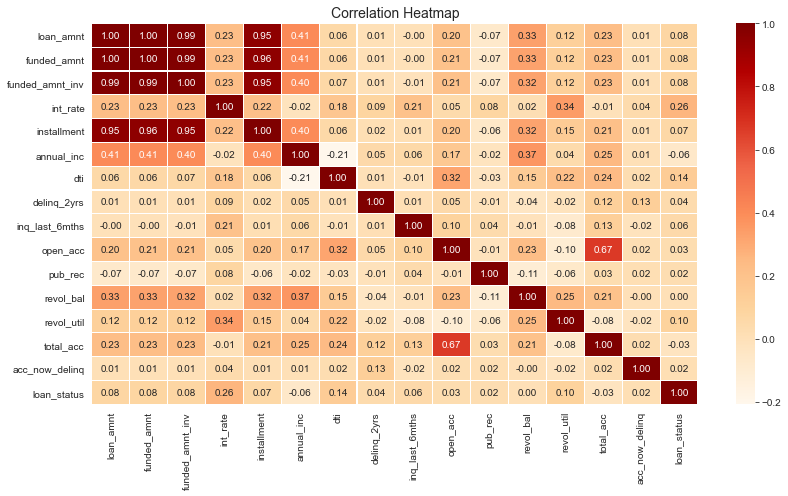

In [10]:
# Correlation heatmap
plt.figure(figsize=(12,7))
parameters = {'axes.labelsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(parameters)

sns.heatmap(df2.corr(), annot=True, fmt=".2f", linewidths=.1, cmap='OrRd')
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.savefig('1Images/1Correlation_1.png', dpi=100)

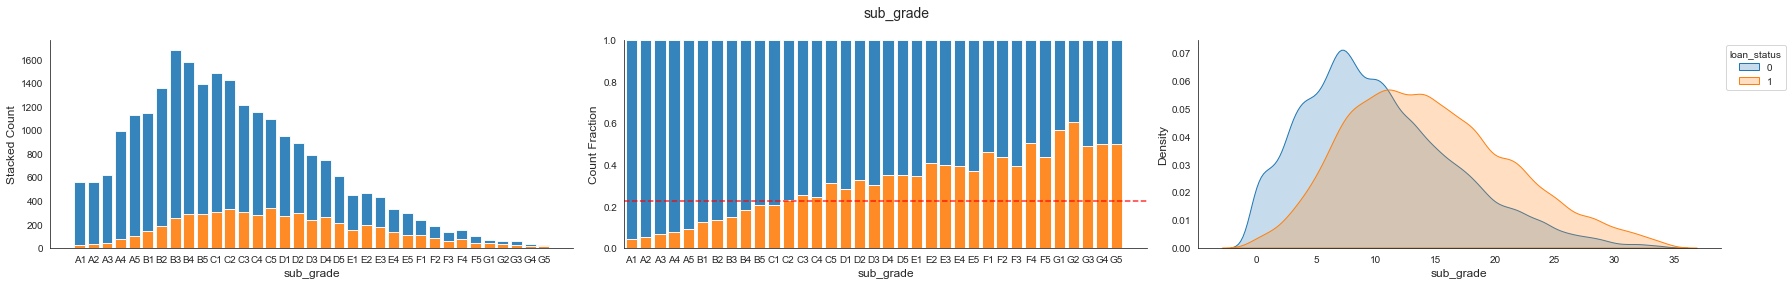

In [13]:
# Plots for categorical attributes
ml.hist_cat(df2, 'sub_grade', target, fsize=(25, 4), rotate=False, palette='tab10')
plt.savefig('1Images/1sub_grade.png', dpi=100)

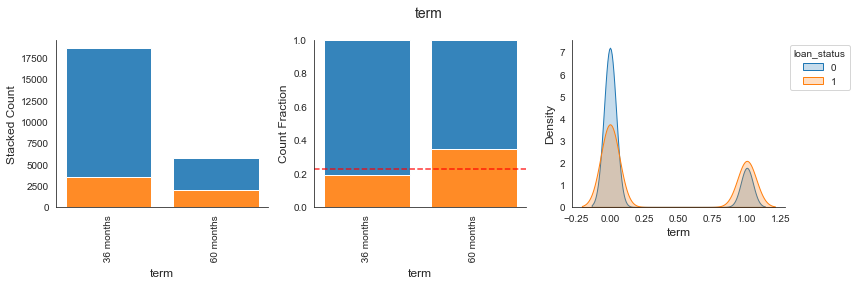

In [14]:
# Plots for categorical attributes
ml.hist_cat(df2, 'term', target, fsize=(12, 4), rotate=True, palette='tab10')
plt.savefig('1Images/1term.png', dpi=100)

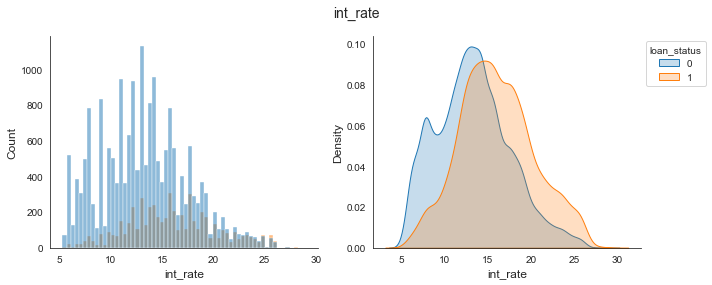

In [15]:
# Plots for numerical attributes
ml.hist_num(df2, 'int_rate', target, bandwidth=1, fsize=(10, 4), skew=True, palette='tab10')
plt.savefig('1Images/1int_rate.png', dpi=100)

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

## Statistical Modeling
- Sections:
    - Part 1: Improve Baseline Performance
        - Feature Engineering
        - Categorize Numerical and Categorical Attributes
        - Preprocess Data, Oversampling, Cross-validation
        - Model Optimization
        - Results
        - Feature Importance    
        - Additional Plots
    - Part 2: Evaluate Test Set
        - Results

### Part 1: Improve Baseline Performance

#### (Part 1) Feature Engineering

In [16]:
# New copy of data
df4 = df2.drop(target, axis=1, errors='ignore').copy()

# Show basic data info.
_ = ml.data_info(df4)
df4.head(3)

---------- Data Shape ----------
Data:	 (24380, 31)


---------- General Data Info. ----------
                    Unique  Count   Dtypes  Null Null %
revol_bal            16944  24380  float64     0    0.0
emp_title            16838  23016   object  1364    5.6
installment          12422  24380  float64     0    0.0
title                 6150  24380   object     0    0.0
dti                   3534  24380  float64     0    0.0
annual_inc            3136  24380  float64     0    0.0
funded_amnt_inv       1966  24380  float64     0    0.0
funded_amnt           1072  24380  float64     0    0.0
loan_amnt             1070  24380  float64     0    0.0
revol_util            1050  24361  float64    19    0.1
zip_code               820  24380   object     0    0.0
earliest_cr_line       541  24379   object     1    0.0
int_rate               463  24380  float64     0    0.0
issue_d                103  24380   object     0    0.0
last_pymnt_d            95  24306   object    74    0.3
last_cred

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_pymnt_d,last_credit_pull_d,acc_now_delinq
226430,13900.0,13900.0,13900.0,36 months,17.57,499.53,D,D2,Paramedic,3 years,RENT,62500.0,Not Verified,Feb-2014,credit_card,Credit card refinancing,026xx,MA,16.02,0.0,Sep-2004,0.0,7.0,0.0,10228.0,92.1,9.0,f,Oct-2014,Nov-2014,0.0
624,25000.0,25000.0,24975.0,36 months,8.90,793.84,A,A5,Sunnyside FArms,4 years,RENT,60000.0,Verified,Dec-2011,debt_consolidation,out of debt loan,945xx,CA,25.40,0.0,Jun-1989,0.0,9.0,0.0,28571.0,68.7,16.0,f,Dec-2014,Dec-2014,0.0
94463,5000.0,5000.0,5000.0,36 months,15.31,174.09,C,C2,quest diagnostics,10+ years,RENT,48000.0,Not Verified,Apr-2013,debt_consolidation,free from debt,076xx,NJ,23.65,0.0,May-1996,0.0,11.0,0.0,11157.0,79.7,34.0,w,Jun-2015,Dec-2015,0.0


In [17]:
# Execute clean1 and clean2 - Feature Engineering
clean1_ = ml.clean1()
clean1_.fit(df4, y_train)
df4_ = clean1_.transform(df4)

clean2_ = ml.clean2()
df4_ = clean2_.fit_transform(df4_)

# Show basic data info.
_, ml.data_info(df4_)
df4_.head(3)

emp_title
Vocabulary size: 103 ; Unique # tokens: 18
['national' 'associates' 'software' 'registered' 'america' 'group'
 'specialist' 'district' 'general' 'schools' 'medical center' 'officer'
 'vice' 'owner' 'driver' 'store' 'project manager' 'office manager'] 

title
Vocabulary size: 109 ; Unique # tokens: 27
['debt free' 'cc consolidation' 'refinancing' 'pool' 'consol' 'financial'
 'wedding loan' 'purchase' 'credit card refi' 'improvement loan'
 'credit card consolidation' 'bill consolidation' 'lending' 'small'
 'consolidate debt' 'vacation' 'card payoff' 'card refinance' 'expenses'
 'debt payoff' 'card pay' 'car financing' 'moving relocation' 'pay debt'
 'home buying' 'pay bills' 'reduction'] 

---------- Data Shape ----------
Data:	 (24380, 24)


---------- General Data Info. ----------
                    Unique  Count   Dtypes Null Null %
revol_bal            16944  24380  float64    0    0.0
installment          12422  24380  float64    0    0.0
dti                   3534  24380

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,emp_title_text,title_text
226430,13900.0,13900.0,13900.0,1,17.57,499.53,4,17,4,5,62500.0,1,2,16.02,0.0,0.0,7.0,0.0,10228.0,92.1,9.0,1,0,24
624,25000.0,25000.0,24975.0,1,8.90,793.84,1,5,5,5,60000.0,3,3,25.40,0.0,0.0,9.0,0.0,28571.0,68.7,16.0,1,0,0
94463,5000.0,5000.0,5000.0,1,15.31,174.09,3,12,2,5,48000.0,1,3,23.65,0.0,0.0,11.0,0.0,11157.0,79.7,34.0,2,0,0


#### (Part 1) Categorize Numerical and Categorical Attributes

In [18]:
# Categorize attributes into numerical, categorical, and trim buckets
num_feat, cat_feat = ml.num_cat_split(df4_, num_to_cat_uniq=1, trim_uniq_cat=35)  

Extra trim       :  []
Num_feat         :  ['pub_rec' 'emp_title_text' 'verification_status' 'home_ownership'
 'emp_length' 'term' 'grade' 'sub_grade' 'title_text'
 'initial_list_status' 'purpose' 'open_acc' 'installment' 'loan_amnt'
 'funded_amnt' 'revol_util' 'annual_inc' 'funded_amnt_inv' 'delinq_2yrs'
 'total_acc' 'revol_bal' 'dti' 'int_rate' 'inq_last_6mths']
Cat_feat         :  []


#### (Part 1) Preprocess Data, Load Models, Sampling, Cross-Validation

In [19]:
# Preprocess training data
preprocessor_ = ml.pipeline(reg_cla, 'median', num_feat, cat_feat, rand_st)
X_train2 = preprocessor_.fit_transform(df4_)
y_train2 = y_train.copy()
print(X_train2.shape)

(24380, 24)


In [20]:
# Load models
model = ml.models(reg_cla, rand_st)

# Oversampling
if reg_cla:
    X_train3, y_train3 = (X_train2, y_train2.copy()) 
else:
    X_train3, y_train3 = ml.oversample_random(X_train2, y_train2, rand_st, strategy='auto')
print(X_train3.shape)  

# Scoring metrics  
## Metrics for regression and classification
roc_metric = 'roc_auc_ovo' if len(mod_label) > 2 else 'roc_auc'     # multi-class and binary-class
reg_score = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']
cla_score = [roc_metric, 'f1_macro', 'balanced_accuracy', 'precision_macro', 'recall_macro']

## Name for table reporting
reg_score_name = ['rmse', 'mae', 'r2']
cla_score_name = ['roc_auc', 'f1', 'balanced_accuracy', 'precision', 'recall']

type_ = reg_score if reg_cla else cla_score
type_2 = reg_score_name if reg_cla else cla_score_name

str_add = ['test_']
score_type = [u + k for u in str_add for k in type_]

(37748, 24)


#### (Part 1) Model Optimization

In [22]:
# Optimize model - RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV  
from scipy.stats import reciprocal, randint 

start = time.time()
param_distribs = {'n_estimators': randint(low=100, high=500),      
                  'max_depth': randint(low=3, high=7),
                  'min_child_weight': randint(low=1, high=4),
                  'learning_rate': reciprocal(0.13, 0.3),
                 }

rnd_search = RandomizedSearchCV(model['XGBC'], param_distributions=param_distribs,
                                n_iter=10, cv=10, scoring=type_, n_jobs=-1,
                                random_state=rand_st, refit=type_[0])
rnd_search.fit(X_train3, y_train3)
end = time.time() - start
print('Time taken:', end,'\n')

rnd_search.best_score_, rnd_search.best_params_

Time taken: 474.1445152759552 



(0.9076325632684699,
 {'learning_rate': 0.1362795815074213,
  'max_depth': 6,
  'min_child_weight': 2,
  'n_estimators': 393})

#### (Part 1) Results

In [23]:
# Cross validation - optimized model
import time 
from sklearn.model_selection import cross_validate  

start = time.time()
scores4 = cross_validate(rnd_search.best_estimator_, X_train3, y_train3, 
                         scoring=type_, cv=10, n_jobs=-1)   
end = time.time() - start
print('Time taken:', round(end, 2), 's\n')

## Display scores
scores_data = pd.read_csv('2Results/scores_tbl.csv', index_col=0)  
scores4_ = pd.DataFrame.from_dict(scores4)
scores_data['XGBC-opt-2'] = np.round(scores4_.mean()[2:].values, 3)
scores_data.to_csv('2Results/scores_tbl2.csv')
scores_data      

Time taken: 71.15 s



,LogC,XGBC,XGBC-opt,XGBC-opt-2
roc_auc,0.705,0.861,0.904,0.908
f1,0.652,0.780,0.823,0.825
balanced_accuracy,0.653,0.780,0.823,0.825
precision,0.653,0.783,0.828,0.830
recall,0.653,0.780,0.823,0.825


In [32]:
# --- Extra Spacing ---

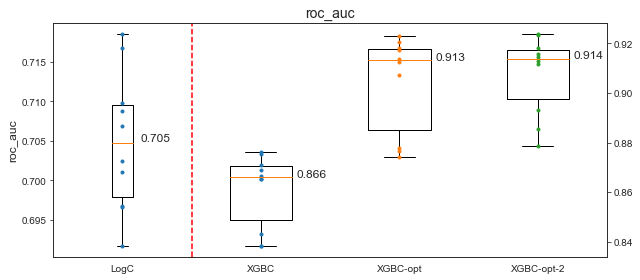

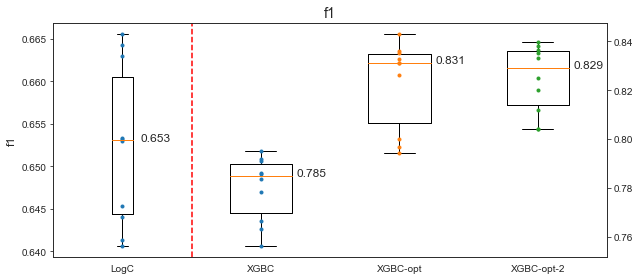

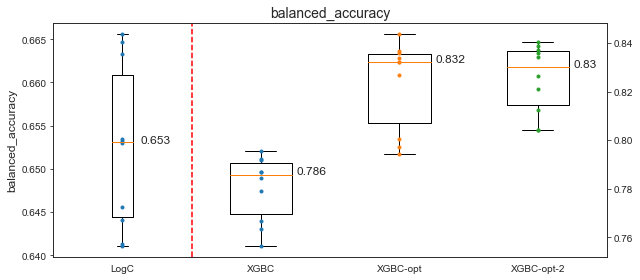

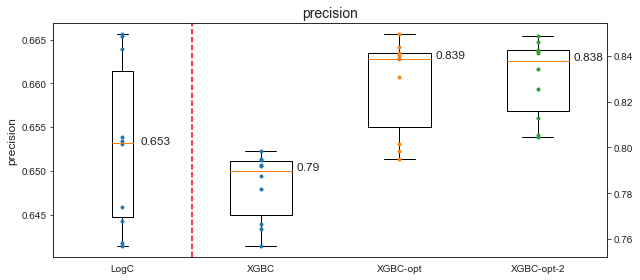

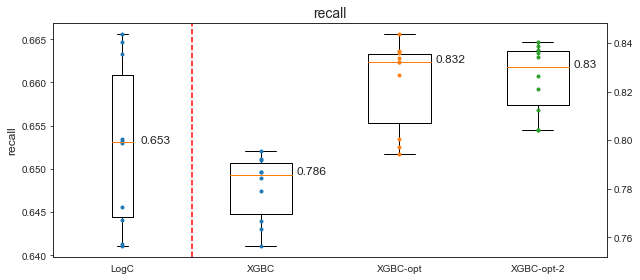

In [25]:
# Load previous scores      
scores1 = pd.read_csv('2Results/scores1.csv')
scores2 = pd.read_csv('2Results/scores2.csv')
scores3 = pd.read_csv('2Results/scores3.csv')

# Boxplots for cross validation results
for i in range(len(score_type)):
    ml.box_result(name=type_2[i], 
                  scores=np.c_[scores1[score_type[i]], scores2[score_type[i]], \
                               scores3[score_type[i]], scores4[score_type[i]]], \
                  labels=scores_data.columns, 
                  fsize=(9, 4), cv=10, x_offset=0.28, twinx=True)
    plt.savefig('1Images/2'+ type_2[i] +'.png', dpi=100)               

In [26]:
# Model fit
clf_ = rnd_search.best_estimator_
clf_.fit(X_train3, y_train3)
X_train3.shape

(37748, 24)

#### (Part 1) Feature Importance

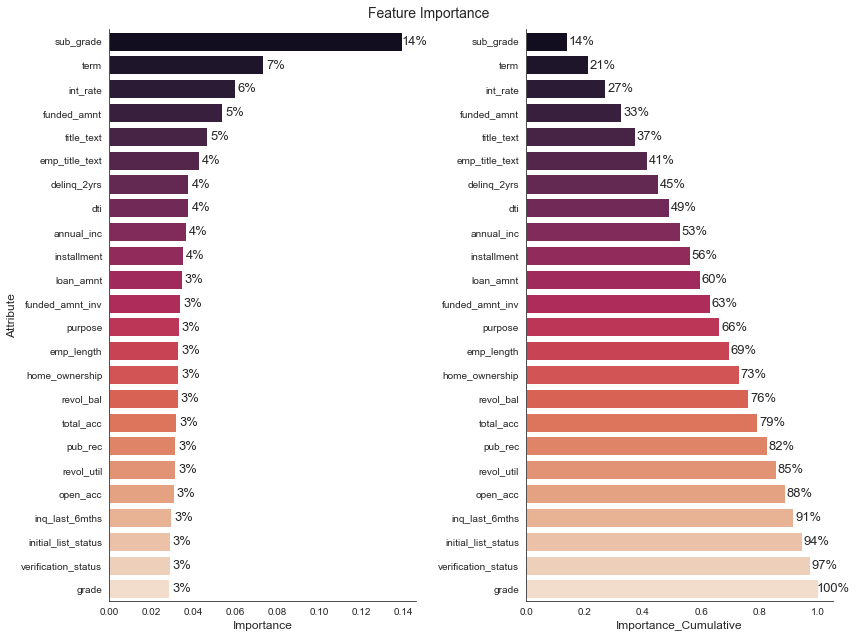

In [28]:
# Feature Importance
ml.feat_imp(num_feat, cat_feat, preprocessor_, clf_, fsize=(12, 9), 
            top=X_train3.shape[1], x1_adj=0.006, x2_adj=0.051, palette='rocket')
plt.savefig('1Images/3Feature_Importance.png', dpi=100)

#### (Part 1) Additional Plots

In [29]:
# Data for plotting
df5 = df4_.copy()
df5[target] = y_train.copy()

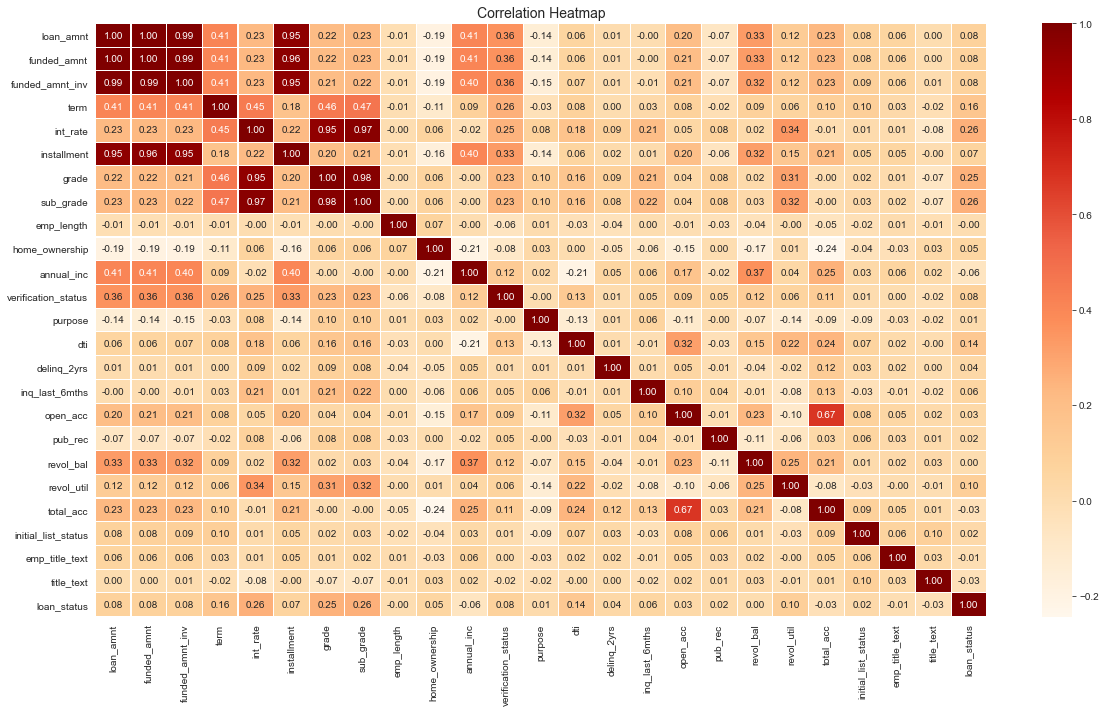

In [31]:
# Correlation heatmap
plt.figure(figsize=(17, 10))
parameters = {'axes.labelsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(parameters)

sns.heatmap(df5.corr(), annot=True, fmt=".2f", linewidths=.1, cmap='OrRd')
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.savefig('1Images/1Correlation_2.png', dpi=100)

In [130]:
# --- Section End ---

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

### Part 2: Evaluate Test Set

#### (Part 2) Results

In [32]:
''' Improved Optimized Model '''
# New copy of data
df_test = X_test.copy()

# Execute clean1 and clean2 on Test
df_test = clean1_.transform(df_test)
df_test = clean2_.transform(df_test)

# Preprocess test data
X_test2 = preprocessor_.transform(df_test)
y_test2 = y_test.copy()
print(X_test2.shape)

(2709, 24)


------ Scores ------
                    LogC   XGBC  XGBC-opt  XGBC-opt-2  Test_set
roc_auc            0.705  0.861     0.904       0.908     0.609
f1                 0.652  0.780     0.823       0.825     0.708
balanced_accuracy  0.653  0.780     0.823       0.825     0.609
precision          0.653  0.783     0.828       0.830     0.722
recall             0.653  0.780     0.823       0.825     0.698 

------ Classification Report ------
              precision  recall  f1-score   support
0                 0.827   0.771     0.798  2097.000
1                 0.363   0.448     0.401   612.000
accuracy          0.698   0.698     0.698     0.698
macro avg         0.595   0.609     0.599  2709.000
weighted avg      0.722   0.698     0.708  2709.000 




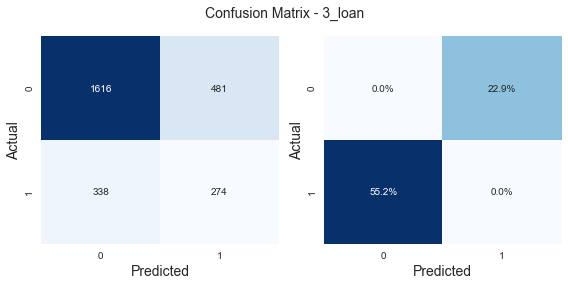

In [33]:
# Predict test - Improved optimized model
y_test_pred = clf_.predict(X_test2)
y_test_pred_proba = 0 if reg_cla else clf_.predict_proba(X_test2)

# Classification
if not reg_cla:
    # Test scores
    test_scores = ml.test_metric(reg_cla, y_test2, y_test_pred, y_test_pred_proba, mod_label)
    scores_data['Test_set'] = test_scores
    scores_data.to_csv('2Results/scores_tbl2.csv')
    print('------ Scores ------') 
    print (scores_data, '\n')

    # Confusion Matrix
    ml.conf_matrix(fname, y_test2, y_test_pred, y_class, fsize=(8, 4), cmap='Blues')
    plt.savefig('1Images/3Confusion_Matrix_Test.png', dpi=100)

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---